<a href="https://colab.research.google.com/github/psylanrex/notebooks/blob/master/red_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

In [3]:
wine_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_df.shape

(1599, 12)

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


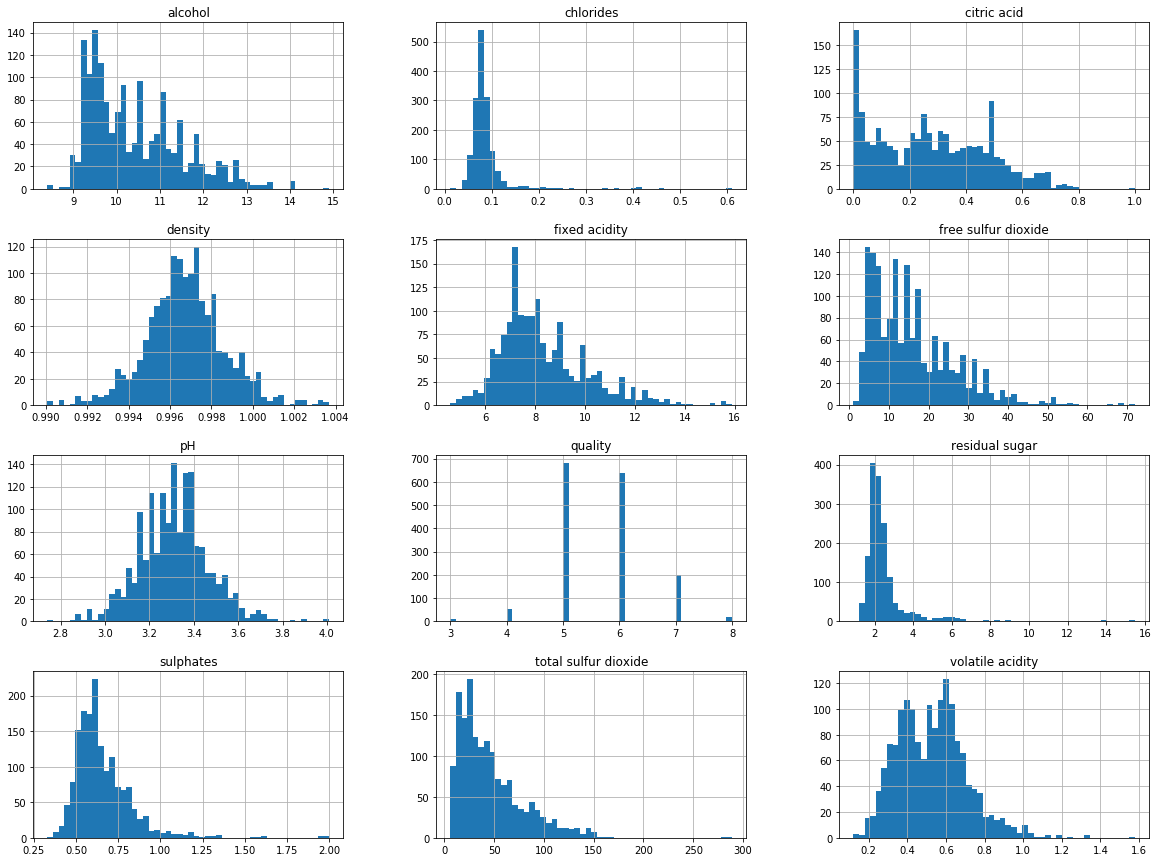

In [7]:
wine_df.hist(bins=50, figsize=(20,15))
plt.show()

Quality is transformed to categorical attribute, less than 7 is not good, 7 and above is good

In [8]:
wine_df['quality_cat'] = wine_df['quality'].apply(lambda x: 'Good' if x > 7 else 'Not Good')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Not Good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Not Good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Not Good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Not Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Not Good


In [0]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(wine_df, wine_df['quality_cat']):
  strat_train_set = wine_df.loc[train_index]
  strat_test_set = wine_df.loc[test_index]

In [10]:
strat_test_set['quality_cat'].value_counts()/len(strat_test_set)

Not Good    0.9875
Good        0.0125
Name: quality_cat, dtype: float64

In [11]:
wine_df['quality_cat'].value_counts()/len(wine_df)

Not Good    0.988743
Good        0.011257
Name: quality_cat, dtype: float64

In [12]:
strat_train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
1492,6.2,0.65,0.06,1.6,0.050,6.0,18.0,0.99348,3.57,0.54,11.95,5,Not Good
1379,7.5,0.57,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.80,6,Not Good
1023,8.2,0.32,0.42,2.3,0.098,3.0,9.0,0.99506,3.27,0.55,12.30,6,Not Good
703,7.5,0.38,0.48,2.6,0.073,22.0,84.0,0.99720,3.32,0.70,9.60,4,Not Good
1326,6.7,0.46,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.60,6,Not Good


In [13]:
wine = strat_train_set.copy()
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
1492,6.2,0.65,0.06,1.6,0.050,6.0,18.0,0.99348,3.57,0.54,11.95,5,Not Good
1379,7.5,0.57,0.02,2.6,0.077,11.0,35.0,0.99557,3.36,0.62,10.80,6,Not Good
1023,8.2,0.32,0.42,2.3,0.098,3.0,9.0,0.99506,3.27,0.55,12.30,6,Not Good
703,7.5,0.38,0.48,2.6,0.073,22.0,84.0,0.99720,3.32,0.70,9.60,4,Not Good
1326,6.7,0.46,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.60,6,Not Good


In [0]:
corr_matrix = wine.corr()

In [15]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.471481
sulphates               0.272712
citric acid             0.225863
fixed acidity           0.128764
residual sugar          0.021843
free sulfur dioxide    -0.056692
pH                     -0.070500
chlorides              -0.109422
density                -0.173241
total sulfur dioxide   -0.182973
volatile acidity       -0.391121
Name: quality, dtype: float64

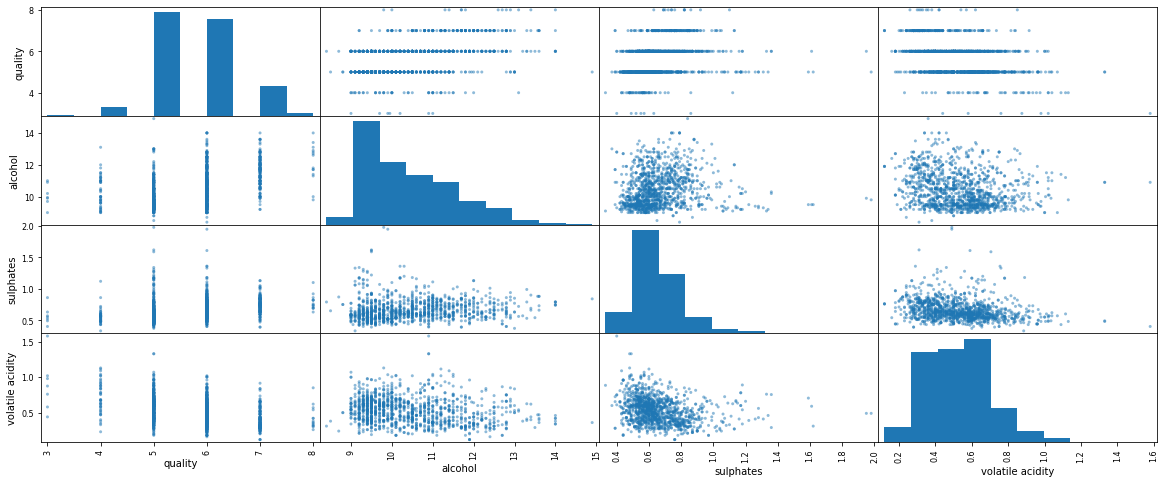

In [16]:
top_corr_attr = ['quality', 'alcohol', 'sulphates', 'volatile acidity']
pd.plotting.scatter_matrix(wine[top_corr_attr], figsize=(20, 8))
plt.show()

Correlations among these attributes are not strong and don't indicate much meaning for each attribute to determine a wine is good or not

In [0]:
wine = strat_train_set.drop(['quality', 'quality_cat'], axis=1)
wine_labels = strat_train_set['quality'].copy()

# Linear Regression

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(wine, wine_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
some_data = wine.iloc[:5]
some_labels = wine_labels[:5]
print('Predictions:', lin_reg.predict(some_data))
print('Labels:', list(some_labels))

Predictions: [5.83079221 5.73282292 6.32563063 5.45783044 5.71915517]
Labels: [5, 6, 6, 4, 6]


In [22]:
training_scores = {}

lin_predictions = lin_reg.predict(wine)
lin_mse = mean_squared_error(wine_labels, lin_predictions)
lin_rmse = np.sqrt(lin_mse)
training_scores['Linear Regression'] = format(lin_rmse, '.4f')
training_scores

{'Linear Regression': '0.6445'}

# Decision Tree Regressor

In [34]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine, wine_labels)
tree_predictions = tree_reg.predict(wine)
tree_mse = mean_squared_error(wine_labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
training_scores['Tree Regression'] = format(tree_rmse, '.4f')
training_scores

{'Linear Regression': '0.6445', 'Tree Regression': '0.0000'}

Decision Tree Regression shows overfitting sign, even worse than Linear Regression model in predicting new data

# Cross Validation

In [0]:
tree_cv_scores = cross_val_score(tree_reg, wine, wine_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_cv_scores)

In [0]:
def display_score(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [32]:
display_score(tree_rmse_scores)

Scores: [0.81009259 0.71807033 0.86150305 0.8291562  0.73420876 0.80525617
 0.80039053 0.8431711  0.73950997 0.78869972]
Mean: 0.7930058408497123
Standard Deviation: 0.0457871246934092


In [37]:
training_scores['Tree Regression CV'] = format(tree_rmse_scores.mean(), '.4f')
training_scores

{'Linear Regression': '0.6445',
 'Tree Regression': '0.0000',
 'Tree Regression CV': '0.7930'}

In [38]:
lin_cv_scores = cross_val_score(lin_reg, wine, wine_labels, scoring='neg_mean_squared_error', cv=10)
lin_cv_rmse_scores = np.sqrt(-lin_cv_scores)
display_score(lin_cv_rmse_scores)

Scores: [0.62905326 0.70774897 0.64116018 0.6765921  0.56865369 0.60480816
 0.56524628 0.74294746 0.73262117 0.63707162]
Mean: 0.6505902889696339
Standard Deviation: 0.060025707148196196


In [39]:
training_scores['Linear Regression CV'] = format(lin_cv_rmse_scores.mean(), '.4f')
training_scores

{'Linear Regression': '0.6445',
 'Linear Regression CV': '0.6506',
 'Tree Regression': '0.0000',
 'Tree Regression CV': '0.7930'}

# Fine Tune Model

## Grid Search

In [0]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [41]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(wine, wine_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [42]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [43]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(format(np.sqrt(-mean_score), '.4f'), params)

0.6781 {'max_features': 2, 'n_estimators': 3}
0.6276 {'max_features': 2, 'n_estimators': 10}
0.6003 {'max_features': 2, 'n_estimators': 30}
0.6890 {'max_features': 4, 'n_estimators': 3}
0.6232 {'max_features': 4, 'n_estimators': 10}
0.6013 {'max_features': 4, 'n_estimators': 30}
0.6794 {'max_features': 6, 'n_estimators': 3}
0.6254 {'max_features': 6, 'n_estimators': 10}
0.5987 {'max_features': 6, 'n_estimators': 30}
0.6943 {'max_features': 8, 'n_estimators': 3}
0.6267 {'max_features': 8, 'n_estimators': 10}
0.6065 {'max_features': 8, 'n_estimators': 30}
0.6806 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.6143 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.6884 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.6217 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.6699 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
0.6214 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [46]:
cv_rmse = np.sqrt(-cv_results['mean_test_score'])
cv_rmse.min()

0.598714772161285

In [54]:
training_scores['Random Forest Grid Search'] = format(cv_rmse.min(), '.4f')
training_scores

{'Linear Regression': '0.6445',
 'Linear Regression CV': '0.6506',
 'Random Forest Grid Search': '0.5987',
 'Tree Regression': '0.0000',
 'Tree Regression CV': '0.7930'}

In [0]:
X_test = strat_test_set.drop(['quality', 'quality_cat'], axis=1)
y_test = strat_test_set['quality'].copy()

In [0]:
final_model = grid_search.best_estimator_

In [0]:
final_predictions = final_model.predict(X_test)

In [58]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.6118874488008396

In [59]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([0.53202525, 0.68246731])

At a 95% confidence interval, the estimate for RMSE of this model is ranging between 0.5320 and 0.6824. That means at 95% confidence level, the predicted score for a wine would be half a point different from the actual point